### Monte Carlo Simulation of Total Recycled Plastic Waste

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statistics import median

$$ Recycled_t  = n_t * P $$
n = Units sold\
P = Plastic(kg) per unit

In [60]:
benchmark =  4000000
months = 60

#inputs for fixed variables
#P = 0.65

In [38]:
#inputs for moving variables and variance
n, mu_n, sigma_n = 100000, 0.001, 0.02

In [69]:
num_simulations = 10000

##### Profit Function

In [70]:
def profit(P):
    n_sim = (1 + np.random.normal(mu_n, sigma_n, months)).cumprod()

    y = ((n*n_sim)*P).cumsum()
    
    return y

##### Bayesian Optimisation Minimal Amount of Plastic per Brick to Achieve Benchmark

In [71]:
def price_eval(P):
    end_profit = []
    for i in range(num_simulations):
        y = profit(P)
        end_profit.append(y[-1])
        
    x = median(end_profit) - benchmark
    if x<0: x = 999999
    return -x

In [72]:
#!pip install bayesian-optimization
from bayes_opt import BayesianOptimization

price_bo = BayesianOptimization(price_eval, {'P' : (0.5, 1.5)})
                              
# init_points=20, n_iter=100 for final pred
price_bo.maximize(init_points=20, n_iter=100, acq='ei')

|   iter    |  target   |     P     |
-------------------------------------
|  1        | -2.119e+0 |  0.9924   |
|  2        | -7.623e+0 |  0.7733   |
|  3        | -2.374e+0 |  1.034    |
|  4        | -2.83e+06 |  1.108    |
|  5        | -2.572e+0 |  1.068    |
|  6        | -4.517e+0 |  1.383    |
|  7        | -1e+06    |  0.6336   |
|  8        | -4.325e+0 |  1.349    |
|  9        | -2.613e+0 |  1.073    |
|  10       | -3.618e+0 |  1.237    |
|  11       | -1.128e+0 |  0.8323   |
|  12       | -4.37e+06 |  1.362    |
|  13       | -4.297e+0 |  1.346    |
|  14       | -4.427e+0 |  1.37     |
|  15       | -1.499e+0 |  0.8949   |
|  16       | -8.423e+0 |  0.7853   |
|  17       | -5.172e+0 |  0.7345   |
|  18       | -4.319e+0 |  1.355    |
|  19       | -2.518e+0 |  1.058    |
|  20       | -4.875e+0 |  1.443    |
|  21       | -2.392e+0 |  0.689    |
|  22       | -3.44e+05 |  0.7054   |
|  23       | -1.225e+0 |  0.6695   |
|  24       | -1e+06    |  0.5      |
|  25       

In [73]:
print("Optimal Price: ", price_bo.max)

Optimal Price:  {'target': -1520.3356354869902, 'params': {'P': 0.6497449950803331}}


##### Monte Carlo Simulation with Graph

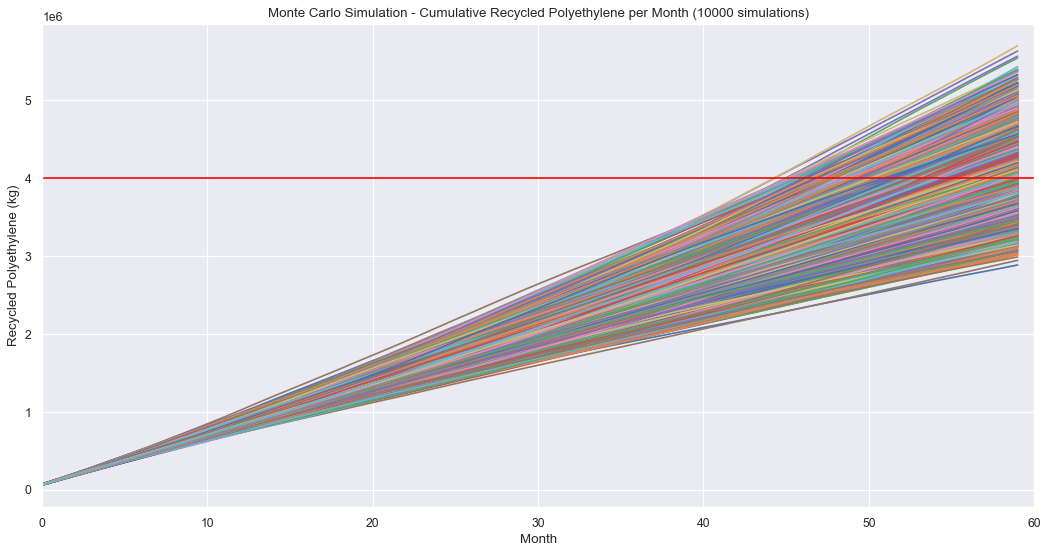

In [78]:
P = 0.6497

end_profit = []

plt.figure(figsize=(16, 8), dpi=80)

for i in range(num_simulations):
    y = profit(P)
    
    end_profit.append(y[-1])
    
    plt.title("Monte Carlo Simulation - Cumulative Recycled Polyethylene per Month (" + str(num_simulations) + " simulations)")
    plt.xlabel("Month")
    plt.ylabel("Recycled Polyethylene (kg)")
    plt.xlim([0, months])
    plt.plot(y)
    
plt.axhline(benchmark, c='red')

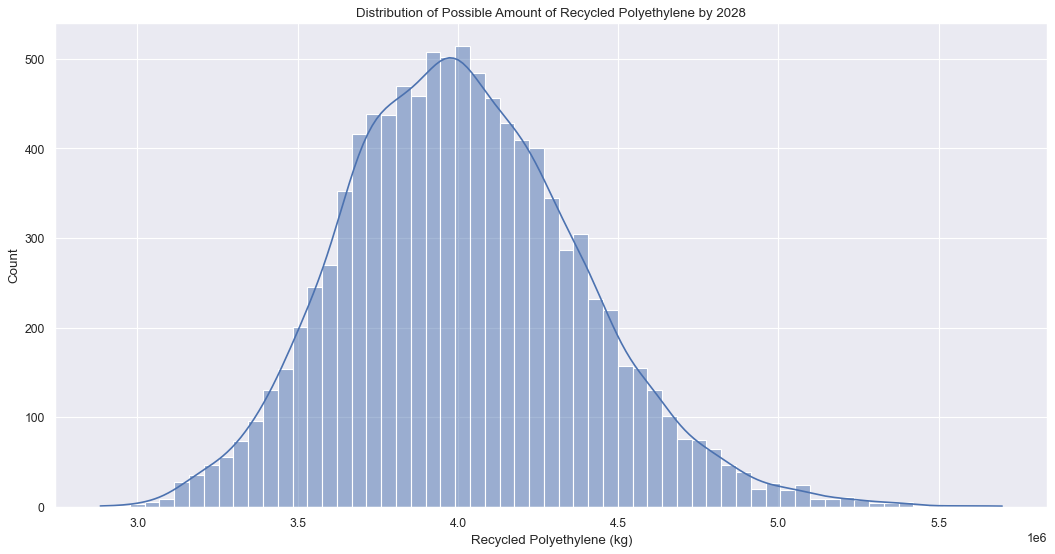

In [79]:
plt.figure(figsize=(16, 8), dpi=80)
sns.set(style="darkgrid")
sns.histplot(end_profit, kde=True)
plt.title("Distribution of Possible Amount of Recycled Polyethylene by 2028")
plt.xlabel("Recycled Polyethylene (kg)")
plt.show()

In [76]:
prob = (sum(x > benchmark for x in end_profit)/len(end_profit))

In [77]:
print("The probability of recycling above benchmark is:")
print("2028: " + str(prob*100) + "%")

The probability of recycling above benchmark is:
2028: 50.21%
